In [20]:
import re
import itertools
import numpy as np
from copy import copy
import matplotlib.pyplot as plt

In [2]:
test_input1 = '''on x=10..12,y=10..12,z=10..12
on x=11..13,y=11..13,z=11..13
off x=9..11,y=9..11,z=9..11
on x=10..10,y=10..10,z=10..10'''

In [3]:
test_input2 = '''on x=-20..26,y=-36..17,z=-47..7
on x=-20..33,y=-21..23,z=-26..28
on x=-22..28,y=-29..23,z=-38..16
on x=-46..7,y=-6..46,z=-50..-1
on x=-49..1,y=-3..46,z=-24..28
on x=2..47,y=-22..22,z=-23..27
on x=-27..23,y=-28..26,z=-21..29
on x=-39..5,y=-6..47,z=-3..44
on x=-30..21,y=-8..43,z=-13..34
on x=-22..26,y=-27..20,z=-29..19
off x=-48..-32,y=26..41,z=-47..-37
on x=-12..35,y=6..50,z=-50..-2
off x=-48..-32,y=-32..-16,z=-15..-5
on x=-18..26,y=-33..15,z=-7..46
off x=-40..-22,y=-38..-28,z=23..41
on x=-16..35,y=-41..10,z=-47..6
off x=-32..-23,y=11..30,z=-14..3
on x=-49..-5,y=-3..45,z=-29..18
off x=18..30,y=-20..-8,z=-3..13
on x=-41..9,y=-7..43,z=-33..15'''

In [4]:
test_input3 = '''on x=-5..47,y=-31..22,z=-19..33
on x=-44..5,y=-27..21,z=-14..35
on x=-49..-1,y=-11..42,z=-10..38
on x=-20..34,y=-40..6,z=-44..1
off x=26..39,y=40..50,z=-2..11
on x=-41..5,y=-41..6,z=-36..8
off x=-43..-33,y=-45..-28,z=7..25
on x=-33..15,y=-32..19,z=-34..11
off x=35..47,y=-46..-34,z=-11..5
on x=-14..36,y=-6..44,z=-16..29'''

In [5]:
test_input4 = '''on x=-5..47,y=-31..22,z=-19..33
on x=-44..5,y=-27..21,z=-14..35
on x=-49..-1,y=-11..42,z=-10..38
on x=-20..34,y=-40..6,z=-44..1
off x=26..39,y=40..50,z=-2..11
on x=-41..5,y=-41..6,z=-36..8
off x=-43..-33,y=-45..-28,z=7..25
on x=-33..15,y=-32..19,z=-34..11
off x=35..47,y=-46..-34,z=-11..5
on x=-14..36,y=-6..44,z=-16..29
on x=-57795..-6158,y=29564..72030,z=20435..90618
on x=36731..105352,y=-21140..28532,z=16094..90401
on x=30999..107136,y=-53464..15513,z=8553..71215
on x=13528..83982,y=-99403..-27377,z=-24141..23996
on x=-72682..-12347,y=18159..111354,z=7391..80950
on x=-1060..80757,y=-65301..-20884,z=-103788..-16709
on x=-83015..-9461,y=-72160..-8347,z=-81239..-26856
on x=-52752..22273,y=-49450..9096,z=54442..119054
on x=-29982..40483,y=-108474..-28371,z=-24328..38471
on x=-4958..62750,y=40422..118853,z=-7672..65583
on x=55694..108686,y=-43367..46958,z=-26781..48729
on x=-98497..-18186,y=-63569..3412,z=1232..88485
on x=-726..56291,y=-62629..13224,z=18033..85226
on x=-110886..-34664,y=-81338..-8658,z=8914..63723
on x=-55829..24974,y=-16897..54165,z=-121762..-28058
on x=-65152..-11147,y=22489..91432,z=-58782..1780
on x=-120100..-32970,y=-46592..27473,z=-11695..61039
on x=-18631..37533,y=-124565..-50804,z=-35667..28308
on x=-57817..18248,y=49321..117703,z=5745..55881
on x=14781..98692,y=-1341..70827,z=15753..70151
on x=-34419..55919,y=-19626..40991,z=39015..114138
on x=-60785..11593,y=-56135..2999,z=-95368..-26915
on x=-32178..58085,y=17647..101866,z=-91405..-8878
on x=-53655..12091,y=50097..105568,z=-75335..-4862
on x=-111166..-40997,y=-71714..2688,z=5609..50954
on x=-16602..70118,y=-98693..-44401,z=5197..76897
on x=16383..101554,y=4615..83635,z=-44907..18747
off x=-95822..-15171,y=-19987..48940,z=10804..104439
on x=-89813..-14614,y=16069..88491,z=-3297..45228
on x=41075..99376,y=-20427..49978,z=-52012..13762
on x=-21330..50085,y=-17944..62733,z=-112280..-30197
on x=-16478..35915,y=36008..118594,z=-7885..47086
off x=-98156..-27851,y=-49952..43171,z=-99005..-8456
off x=2032..69770,y=-71013..4824,z=7471..94418
on x=43670..120875,y=-42068..12382,z=-24787..38892
off x=37514..111226,y=-45862..25743,z=-16714..54663
off x=25699..97951,y=-30668..59918,z=-15349..69697
off x=-44271..17935,y=-9516..60759,z=49131..112598
on x=-61695..-5813,y=40978..94975,z=8655..80240
off x=-101086..-9439,y=-7088..67543,z=33935..83858
off x=18020..114017,y=-48931..32606,z=21474..89843
off x=-77139..10506,y=-89994..-18797,z=-80..59318
off x=8476..79288,y=-75520..11602,z=-96624..-24783
on x=-47488..-1262,y=24338..100707,z=16292..72967
off x=-84341..13987,y=2429..92914,z=-90671..-1318
off x=-37810..49457,y=-71013..-7894,z=-105357..-13188
off x=-27365..46395,y=31009..98017,z=15428..76570
off x=-70369..-16548,y=22648..78696,z=-1892..86821
on x=-53470..21291,y=-120233..-33476,z=-44150..38147
off x=-93533..-4276,y=-16170..68771,z=-104985..-24507'''

In [6]:
puzzle_input = open('inputs/22').read().strip()

In [7]:
reg = "x=(-?\d+)\.\.(-?\d+),y=(-?\d+)\.\.(-?\d+),z=(-?\d+)\.\.(-?\d+)"

In [8]:
def parse(puzzle_input):
    instructions = []
    
    for s in puzzle_input.split('\n'):
        on, coords = s.split()
        on = 1 if on == 'on' else 0
        m = re.match(reg, coords)
        coords = [(int(m.group(2*i-1)), int(m.group(2*i))) for i in range(1, 4)]
        
        instructions.append((on, coords))
        
    return instructions

In [9]:
parse(test_input1)

[(1, [(10, 12), (10, 12), (10, 12)]),
 (1, [(11, 13), (11, 13), (11, 13)]),
 (0, [(9, 11), (9, 11), (9, 11)]),
 (1, [(10, 10), (10, 10), (10, 10)])]

In [10]:
board = np.zeros((101, 101, 101), dtype=np.int8)

In [11]:
np.product(board.shape)

1030301

for on, instructions in parse(puzzle_input):
    (x_low, x_high), (y_low, y_high), (z_low, z_high) = instructions

    if any(low < -50 for low in [x_low, y_low, z_low]) or any(high > 50 for high in [x_high, y_high, z_high]):
        print("Continuing: ", instructions)
        continue
        
    x_low += 50
    y_low += 50
    z_low += 50
    
    x_high += 50
    y_high += 50
    z_high += 50
                
    board[x_low:(x_high+1), y_low:(y_high+1), z_low:(z_high+1)] = on

In [12]:
board.sum()

0

In [13]:
def split(p1, p2):
    [a, b, c, d] = sorted([*p1, *p2])
    
    if (a == b and b == c and c == d):
        return [(a, a)]
    elif (a == b and b == c):
        return [(a, a), (a+1, d)]
    elif (b == c and c == d):
        return [(a, b-1), (b, b)]
    elif (a == b) and (c == d):
        return [(a, c)]
    elif (a == b):
        return [(a, c), (c+1, d)]
    elif (b == c):
        return [(a, b-1), (b, b), (b+1, d)]
    elif (c == d):
        return [(a, b-1), (b+1, d)]
    else:
        return [(a, b-1), (b, c), (c+1, d)]

In [14]:
# Modified from:
# https://pryp.in/blog/15/intersection-and-difference-of-two-rectangles.html
# Generalized to 3D, added a union function, and changed argument order.

class Cuboid:
    def intersection(self, other):
        a, b = self, other
        x1 = max(min(a.x1, a.x2), min(b.x1, b.x2))
        y1 = max(min(a.y1, a.y2), min(b.y1, b.y2))
        z1 = max(min(a.z1, a.z2), min(b.z1, b.z2))
        
        x2 = min(max(a.x1, a.x2), max(b.x1, b.x2))
        y2 = min(max(a.y1, a.y2), max(b.y1, b.y2))
        z2 = min(max(a.z1, a.z2), max(b.z1, b.z2))

        if x1 <= x2 and y1 <= y2 and z1 <= z2:
            return type(self)(x1, x2, y1, y2, z1, z2)
    __and__ = intersection

    def complement(self):
        xs = [(-np.inf, self.x1-1), (self.x1, self.x2), (self.x2+1, np.inf)]
        ys = [(-np.inf, self.y1-1), (self.y1, self.y2), (self.y2+1, np.inf)]
        zs = [(-np.inf, self.z1-1), (self.z1, self.z2), (self.z2+1, np.inf)]
    
        for (x1, x2), (y1, y2), (z1, z2) in itertools.product(xs, ys, zs):
            rect = type(self)(x1, x2, y1, y2, z1, z2)
            
            if rect != self:
                yield rect
    
    def difference(self, other):
        inter = self & other
        
        # we've ensured an intersection
        if not inter:
            yield self
            return
                
        for c in other.complement():
            i = self & c
            if i:
                yield i
    __sub__ = difference
    
    def union(self, other):
        # guaranteed no overlap
        inter = self & other
        
        if inter:
            yield inter
        
        yield from self.difference(other)
        yield from other.difference(self)
    __or__ = union
    
    def volume(self):
        return (self.z2 - self.z1 + 1) * (self.y2 - self.y1 + 1) * (self.x2 - self.x1 + 1)

    def __init__(self, x1, x2, y1, y2, z1, z2):
        self.x1, self.x2, self.y1, self.y2, self.z1, self.z2 = x1, x2, y1, y2, z1, z2

    def __iter__(self):
        yield self.x1
        yield self.x2
        yield self.y1
        yield self.y2
        yield self.z1
        yield self.z2

    def __eq__(self, other):
        return isinstance(other, Cuboid) and tuple(self) == tuple(other)
    
    def __ne__(self, other):
        return not (self == other)

    def __repr__(self):
        return type(self).__name__ + repr(tuple(self))
    
    def __hash__(self):
        return hash(self.__repr__())
    
    def subset(self, other):
        return self == self & other
    
    def __copy__(self):
        return type(self)(self.x1, self.x2, self.y1, self.y2, self.z1, self.z2)

In [15]:
def cub_set_diff(cuboids, d):
    new_cuboids = set()
    
    for c in cuboids:
        new_cuboids.update(c.difference(d))
    
    return new_cuboids

In [19]:
cuboids = set()

for on, instructions in parse(puzzle_input):
    x, y, z = instructions
    
    new = Cuboid(*x, *y, *z)
    new_cuboids = set()

    if on:
        chunked_new = {new}

        for c in cuboids:
            inter = c & new
            
            if inter:
                new_cuboids.add(inter)

            new_cuboids.update(c.difference(new))
            chunked_new = cub_set_diff(chunked_new, c)

        new_cuboids.update(chunked_new)
    else:
        new_cuboids = cub_set_diff(cuboids, new)

    cuboids = new_cuboids
    
    print(len(cuboids))
            
print(sum(c.volume() for c in cuboids))
print()

1
15
59
114
216
359
541
735
987
1306
1306
1720
1754
1935
1976
2266
2272
2726
2782
3312
3313
3314
3315
3316
3317
3318
3319
3320
3321
3322
3323
3324
3342
3343
3357
3358
3359
3360
3361
3362
3363
3373
3374
3375
3417
3427
3428
3446
3447
3448
3449
3477
3512
3513
3514
3515
3529
3553
3567
3609
3638
3639
3640
3641
3664
3665
3679
3763
3787
3788
3802
3816
3830
3868
3904
3927
3928
3929
3960
4049
4068
4088
4143
4203
4204
4218
4232
4246
4264
4265
4266
4333
4334
4407
4511
4525
4566
4627
4745
4746
4867
4868
4878
4892
4906
4945
4946
5016
5126
5140
5150
5203
5249
5286
5300
5340
5341
5437
5476
5621
5622
5649
5678
5787
5858
5859
5907
5934
6012
6111
6145
6165
6179
6236
6294
6295
6349
6369
6403
6513
6531
6545
6590
6591
6680
6781
6834
6924
7027
7050
7145
7269
7386
7415
7507
7559
7697
7807
7886
7987
8026
8115
8253
8393
8413
8451
8591
8625
8635
8712
8937
9017
9188
9202
9267
9348
9464
9557
9622
9650
9693
9834
9980
10181
10277
10321
10335
10461
10584
10628
10738
10871
11069
11132
11318
11409
11474
11586
11871
11

In [ ]:
# 1218645427221987

(array([3.1583e+04, 3.0100e+02, 6.9000e+01, 3.6000e+01, 8.0000e+00,
        5.0000e+00, 4.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.00000000e+00, 4.15695487e+11, 8.31390975e+11, 1.24708646e+12,
        1.66278195e+12, 2.07847744e+12, 2.49417292e+12, 2.90986841e+12,
        3.32556390e+12, 3.74125939e+12, 4.15695487e+12]),
 <BarContainer object of 10 artists>)

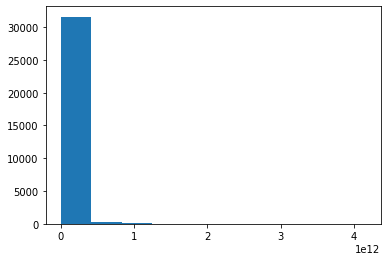

In [21]:
plt.hist([c.volume() for c in cuboids])

In [22]:
vols = [c.volume() for c in cuboids]

In [23]:
np.median(vols)

6288653364.0

In [24]:
np.percentile(vols, 10)

833.0

In [25]:
np.percentile(vols, 1)

6.0